In [0]:
!pip install wget

In [0]:
# dataturks, label, Indian_Number_plates.json
from google.colab import files
files.upload()

Saving dataturks_to_PascalVOC.py to dataturks_to_PascalVOC.py
Saving Indian_Number_plates.json to Indian_Number_plates.json
Saving label.pbtxt to label.pbtxt


{'Indian_Number_plates.json': b'{"content": "http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg","annotation":[{"label":["number_plate"],"notes":"","points":[{"x":0.7220843672456576,"y":0.5879828326180258},{"x":0.8684863523573201,"y":0.6888412017167382}],"imageWidth":806,"imageHeight":466}],"extras":null,"metadata":{"first_done_at":1530954577000,"last_updated_at":1530954577000,"sec_taken":4,"last_updated_by":"eEwQYXCufXNzeGk9nWUhfZnbgK42","status":"done","evaluation":"NONE"}}\n{"content": "http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg","annotation":[{"label":["number_plate"],"notes":"","points":[{"x":0.16194331983805668,"y":0.8507795100222717},{"x":0.582995951417004,"y":1}],"imageWidth":494,"imageHeight":449}],"extras":null,"metadata":{"first_done_at":1530954866000,"las

In [0]:
!mkdir data
%cd data
!mkdir train
!mkdir test
!ls
%cd ..

/content/data
test  train
/content


In [0]:
!python dataturks_to_PascalVOC.py Indian_Number_plates.json './data/train' './data/train'

INFO:root:Completed: 300 items done, 16 items ignored due to errors or for being skipped items.


In [0]:
import os
print(len(os.listdir('./data/train')))
#300 images and 300 voc files

600


In [0]:
import os, shutil
path = "./data/train/"
moveto = "./data/test/"
files = os.listdir(path)
files.sort()
for i,f in enumerate(files):
    if i>499:
      src = path+f
      dst = moveto
      shutil.move(src,dst)

In [0]:
print(len(os.listdir('./data/test')))

100


In [0]:
!mkdir /content/data/train/images
!mkdir /content/data/train/annotations

In [0]:
import os, shutil
path = "/content/data/train/"
files = os.listdir(path)
files.sort()
length = len(files)
i = 0
while(i<length):
    f = files[i]
    if f == 'annotations' or f == 'images':
      i = i+1
      continue
    elif f[-4:] == 'jpeg' or f[-3:] == 'jpg':
      moveto = "/content/data/train/images/"
      src = path+f
      dst = moveto
      shutil.move(src,dst)
      
      i = i+1
      
      f = files[i]
      moveto = "/content/data/train/annotations/"
      src = path+f
      dst = moveto
      shutil.move(src,dst)
    else:
      os.remove('/content/data/train/' + f)
      i = i+1
      f = files[i]
      os.remove('/content/data/train/' + f)
    i = i+1

In [0]:
#len(os.listdir('/content/data/train/annotations/'))
len(os.listdir('/content/data/train/images/'))

243

In [0]:
!mkdir /content/data/test/images
!mkdir /content/data/test/annotations

In [0]:
import os, shutil
path = "/content/data/test/"
files = os.listdir(path)
files.sort()
length = len(files)
i = 0
while(i<length):
    f = files[i]
    if f == 'annotations' or f == 'images':
      i = i+1
      continue
    elif f[-4:] == 'jpeg' or f[-3:] == 'jpg':
      moveto = "/content/data/test/images/"
      src = path+f
      dst = moveto
      shutil.move(src,dst)
      
      i = i+1
      
      f = files[i]
      moveto = "/content/data/test/annotations/"
      src = path+f
      dst = moveto
      shutil.move(src,dst)
    else:
      os.remove('/content/data/test/' + f)
      i = i+1
      f = files[i]
      os.remove('/content/data/test/' + f)
    i = i+1

In [0]:
len(os.listdir('/content/data/test/annotations/'))
#len(os.listdir('/content/data/test/images/'))

50

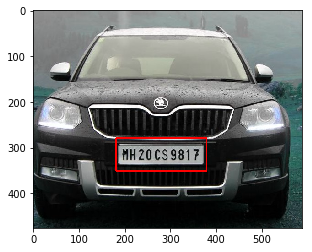

In [0]:
import cv2
img = cv2.imread('/content/data/train/images/03273806-bb1e-48da-8c8b-a0133a90197a___2014-Skoda-Yeti-Test-Drive.jpg.jpeg')
from matplotlib import pyplot as plt
plt.imshow(cv2.rectangle(img,(181,279),(379,351),(255,0,0),2))

In [0]:
#XML to CSV
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
       
        tree = ET.parse(xml_file)
        root = tree.getroot()

        filename = root.find('filename').text
        width = root[4].find('width').text
        height = root[4].find('height').text
        class_ = 'plate'
        xmin = root[6].find('bndbox').find('xmin').text
        ymin = root[6].find('bndbox').find('ymin').text
        xmax = root[6].find('bndbox').find('xmax').text
        ymax = root[6].find('bndbox').find('ymax').text

        xml_list.append([filename,width,height,class_,xmin,ymin,xmax,ymax])
        
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df



image_path = '/content/data/train/annotations'
xml_df = xml_to_csv(image_path)
xml_df.to_csv('/content/train_labels.csv', index=None)

image_path = '/content/data/test/annotations'
xml_df = xml_to_csv(image_path)
xml_df.to_csv('/content/test_labels.csv', index=None)


In [0]:
!git clone https://github.com/tensorflow/models

In [0]:
#upload generate_tfrecord 
from google.colab import files
files.upload()

Saving generate_tfrecord.py to generate_tfrecord.py


{'generate_tfrecord.py': b"#generate tf records\r\n\r\nfrom __future__ import division\r\nfrom __future__ import print_function\r\nfrom __future__ import absolute_import\r\n\r\nimport os\r\nimport io\r\nimport pandas as pd\r\nimport tensorflow as tf\r\n\r\nfrom PIL import Image\r\nfrom object_detection.utils import dataset_util\r\nfrom collections import namedtuple, OrderedDict\r\n\r\nflags = tf.app.flags\r\nflags.DEFINE_string('csv_input', '', 'Path to the CSV input')\r\nflags.DEFINE_string('output_path', '', 'Path to output TFRecord')\r\nflags.DEFINE_string('image_dir', '', 'Path to images')\r\nFLAGS = flags.FLAGS\r\n\r\n\r\n# TO-DO replace this with label map\r\ndef class_text_to_int(row_label):\r\n    if row_label == 'plate':\r\n        return 1\r\n    else:\r\n        None\r\n\r\n\r\ndef split(df, group):\r\n    data = namedtuple('data', ['filename', 'object'])\r\n    gb = df.groupby(group)\r\n    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.

In [0]:
!mv generate_tfrecord.py ./models/research
%cd ./models/research/

/content/models/research


In [0]:
!python generate_tfrecord.py --csv_input=/content/train_labels.csv --output_path=/content/train.record --image_dir=/content/data/train/images

Successfully created the TFRecords: /content/train.record


In [0]:
!python generate_tfrecord.py --csv_input=/content/test_labels.csv --output_path=/content/test.record --image_dir=/content/data/test/images

Successfully created the TFRecords: /content/test.record


In [0]:
%cd /content/models/research/object_detection
!mkdir training

/content/models/research/object_detection


In [0]:
#files.download('./samples/configs/faster_rcnn_inception_v2_pets.config')
#edit the number of classes and the upload

In [0]:
%cd training

/content/models/research/object_detection/training


In [0]:
import wget
url = 'http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz'
filename = wget.download(url)

In [0]:
import tarfile
tar = tarfile.open('faster_rcnn_inception_v2_coco_2018_01_28.tar.gz', "r:gz")
tar.extractall()
tar.close()

In [0]:
#Upload the config file
files.upload()

Saving faster_rcnn_inception_v2_pets.config to faster_rcnn_inception_v2_pets.config


{'faster_rcnn_inception_v2_pets.config': b'# Faster R-CNN with Inception v2, configured for Oxford-IIIT Pets Dataset.\n# Users should configure the fine_tune_checkpoint field in the train config as\n# well as the label_map_path and input_path fields in the train_input_reader and\n# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that\n# should be configured.\n\nmodel {\n  faster_rcnn {\n    num_classes: 1\n    image_resizer {\n      keep_aspect_ratio_resizer {\n        min_dimension: 600\n        max_dimension: 1024\n      }\n    }\n    feature_extractor {\n      type: \'faster_rcnn_inception_v2\'\n      first_stage_features_stride: 16\n    }\n    first_stage_anchor_generator {\n      grid_anchor_generator {\n        scales: [0.25, 0.5, 1.0, 2.0]\n        aspect_ratios: [0.5, 1.0, 2.0]\n        height_stride: 16\n        width_stride: 16\n      }\n    }\n    first_stage_box_predictor_conv_hyperparams {\n      op: CONV\n      regularizer {\n        l2_regularize

In [0]:
%cd /content/models/research/object_detection/legacy

/content/models/research/object_detection/legacy


In [0]:
!cp train.py /content/models/research/
%cd /content/models/research/object_detection/protos

/content/models/research/object_detection/protos


In [0]:
#upload protoc files
files.upload()

In [0]:
%cd /content/models/research

/content/models/research


In [0]:
import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

In [0]:
!python /content/models/research/object_detection/builders/model_builder_test.py


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

............s...
----------------------------------------------------------------------
Ran 16 tests in 0.063s

OK (skipped=1)


In [0]:
!python train.py --logtostderr --train_dir=/content/models/research/object_detection/training --pipeline_config_path=/content/models/research/object_detection/training/faster_rcnn_inception_v2_pets.config


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use object_detection/model_main.py.
Instructions for updating:
Please switch to tf.train.create_global_step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Scale of 0 disables reg

In [0]:
!ls

a3c_blogpost			  lm_commonsense
adversarial_crypto		  lstm_object_detection
adversarial_logit_pairing	  marco
adversarial_text		  maskgan
adv_imagenet_models		  minigo
astronet			  morph_net
attention_ocr			  namignizer
audioset			  neural_gpu
autoaugment			  neural_programmer
autoencoder			  next_frame_prediction
brain_coder			  nst_blogpost
cognitive_mapping_and_planning	  object_detection
cognitive_planning		  pcl_rl
compression			  ptn
cvt_text			  qa_kg
deep_contextual_bandits		  README.md
deeplab				  real_nvp
deep_speech			  rebar
delf				  resnet
differential_privacy		  sentiment_analysis
domain_adaptation		  seq2species
efficient-hrl			  setup.py
feelvos				  skip_thoughts
fivo				  slim
gan				  steve
generate_tfrecord.py		  street
global_objectives		  struct2depth
im2txt				  swivel
inception			  syntaxnet
keypointnet			  tcn
learned_optimizer		  tensorrt
learning_to_remember_rare_events  textsum
learning_unsupervised_learning	  train.py
lexnet_nc			  transformer
lfads				  

In [0]:
% cd /content

In [0]:
files.upload()

In [0]:
!unzip protoc-3.2.0-linux-x86_64.zip -d protoc3
!sudo mv protoc3/bin/* /usr/local/bin/
!sudo mv protoc3/include/* /usr/local/include/
!sudo chwon [user] /usr/local/bin/protoc
!sudo chwon -R [user] /usr/local/include/google

In [0]:
!ls /bin/